In [5]:
# -- Step 1: Import Libraries --

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [6]:

# ==============================================
# Step 2: Upload and Read the Dataset
# ==============================================

# You can upload directly in Colab using:
# from google.colab import files
# uploaded = files.upload()

# Then read the file:
cardio_data = pd.read_csv('/content/Cardiotocographic.csv')

# Inspect the dataset
display(cardio_data.head())
display(cardio_data.tail())

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB

--- Statistical Summary ---


,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000



--- Shape of Dataset ---
(2126, 15)

--- Class Distribution ---
NSP
1    1655
2     295
3     176
Name: count, dtype: int64


/tmp/ipython-input-788510412.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NSP", data=cardio_data, palette="Set2")


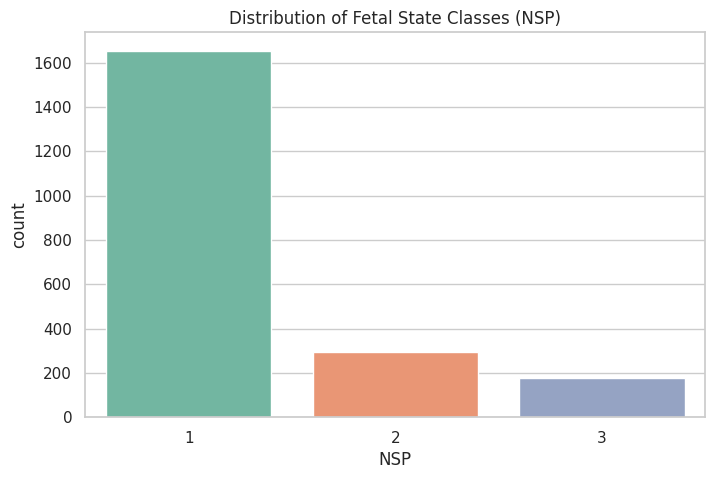

In [7]:
# ==============================================
# Step 3: Explore the Dataset
# ==============================================

print("\n--- Dataset Info ---")
cardio_data.info()

print("\n--- Statistical Summary ---")
display(cardio_data.describe())

print("\n--- Shape of Dataset ---")
print(cardio_data.shape)

print("\n--- Class Distribution ---")
print(cardio_data['NSP'].value_counts())

# Visualize class imbalance
sns.countplot(x="NSP", data=cardio_data, palette="Set2")
plt.title("Distribution of Fetal State Classes (NSP)")
plt.show()

In [8]:
# ==============================================
# Step 4: Preprocess the Data
# ==============================================

# Separate features and target variable
X = cardio_data.drop('NSP', axis=1)
y = cardio_data['NSP'] - 1  # Convert 1,2,3 to 0,1,2

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0
)

In [9]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# ==============================================
# Step 5: Build the Neural Network Model
# ==============================================

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(14,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# ==============================================
# Step 6: Train the Model
# ==============================================

# Handle class imbalance
class_weights = {0: 1, 1: 5.6, 2: 9.4}

history = model.fit(
    X_train, np.asarray(y_train),
    batch_size=32,
    epochs=150,
    verbose=2,
    class_weight=class_weights,
    validation_split=0.2
)

Epoch 1/150
43/43 - 0s - 6ms/step - accuracy: 0.8559 - loss: 0.8629 - val_accuracy: 0.8324 - val_loss: 0.3786
Epoch 2/150
43/43 - 0s - 4ms/step - accuracy: 0.8551 - loss: 0.8570 - val_accuracy: 0.8353 - val_loss: 0.3787
Epoch 3/150
43/43 - 0s - 4ms/step - accuracy: 0.8588 - loss: 0.8535 - val_accuracy: 0.8353 - val_loss: 0.3786
Epoch 4/150
43/43 - 0s - 5ms/step - accuracy: 0.8581 - loss: 0.8487 - val_accuracy: 0.8382 - val_loss: 0.3793
Epoch 5/150
43/43 - 0s - 4ms/step - accuracy: 0.8588 - loss: 0.8513 - val_accuracy: 0.8324 - val_loss: 0.3799
Epoch 6/150
43/43 - 0s - 4ms/step - accuracy: 0.8596 - loss: 0.8430 - val_accuracy: 0.8353 - val_loss: 0.3779
Epoch 7/150
43/43 - 0s - 4ms/step - accuracy: 0.8596 - loss: 0.8395 - val_accuracy: 0.8353 - val_loss: 0.3803
Epoch 8/150
43/43 - 0s - 4ms/step - accuracy: 0.8596 - loss: 0.8389 - val_accuracy: 0.8412 - val_loss: 0.3803
Epoch 9/150
43/43 - 0s - 4ms/step - accuracy: 0.8654 - loss: 0.8350 - val_accuracy: 0.8529 - val_loss: 0.3784
Epoch 10/1

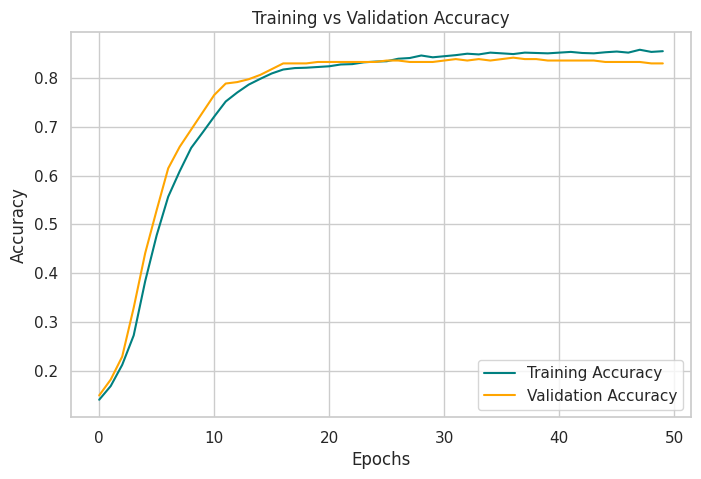

In [12]:
# ==============================================
# Step 7: Evaluate Model Performance
# ==============================================

# Plot training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Accuracy', color='teal')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

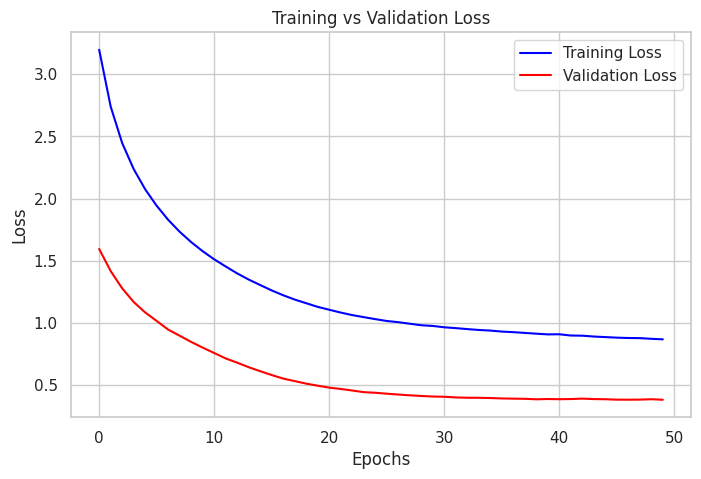

In [13]:
# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


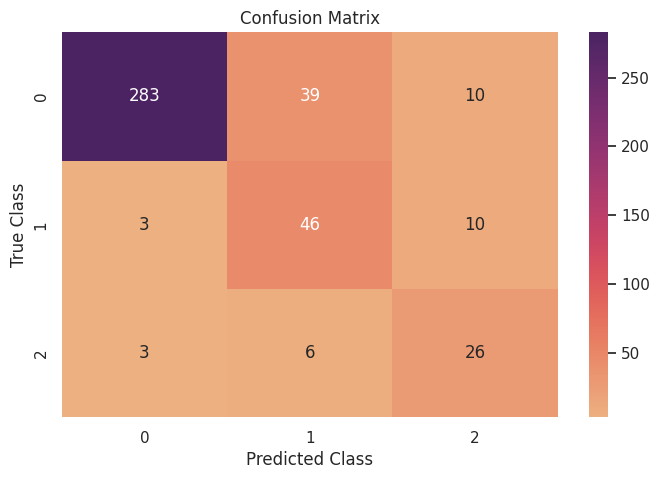


--- Classification Report ---

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       332
           1       0.51      0.78      0.61        59
           2       0.57      0.74      0.64        35

    accuracy                           0.83       426
   macro avg       0.68      0.79      0.72       426
weighted avg       0.88      0.83      0.85       426



In [14]:
# ==============================================
# Step 8: Model Predictions and Evaluation
# ==============================================

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

# Classification Report
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred))


--- Training Model with 200 Epochs ---
Epoch 1/200
43/43 - 1s - 28ms/step - accuracy: 0.3669 - loss: 3.0684 - val_accuracy: 0.3824 - val_loss: 1.3399
Epoch 2/200
43/43 - 0s - 5ms/step - accuracy: 0.4551 - loss: 2.5633 - val_accuracy: 0.5088 - val_loss: 1.1334
Epoch 3/200
43/43 - 0s - 7ms/step - accuracy: 0.5404 - loss: 2.2551 - val_accuracy: 0.6000 - val_loss: 0.9839
Epoch 4/200
43/43 - 0s - 5ms/step - accuracy: 0.6257 - loss: 2.0497 - val_accuracy: 0.6588 - val_loss: 0.8743
Epoch 5/200
43/43 - 0s - 5ms/step - accuracy: 0.6735 - loss: 1.9028 - val_accuracy: 0.6941 - val_loss: 0.7957
Epoch 6/200
43/43 - 0s - 5ms/step - accuracy: 0.7132 - loss: 1.7791 - val_accuracy: 0.7235 - val_loss: 0.7318
Epoch 7/200
43/43 - 0s - 5ms/step - accuracy: 0.7368 - loss: 1.6857 - val_accuracy: 0.7353 - val_loss: 0.6803
Epoch 8/200
43/43 - 0s - 5ms/step - accuracy: 0.7515 - loss: 1.6057 - val_accuracy: 0.7559 - val_loss: 0.6334
Epoch 9/200
43/43 - 0s - 5ms/step - accuracy: 0.7699 - loss: 1.5380 - val_accur

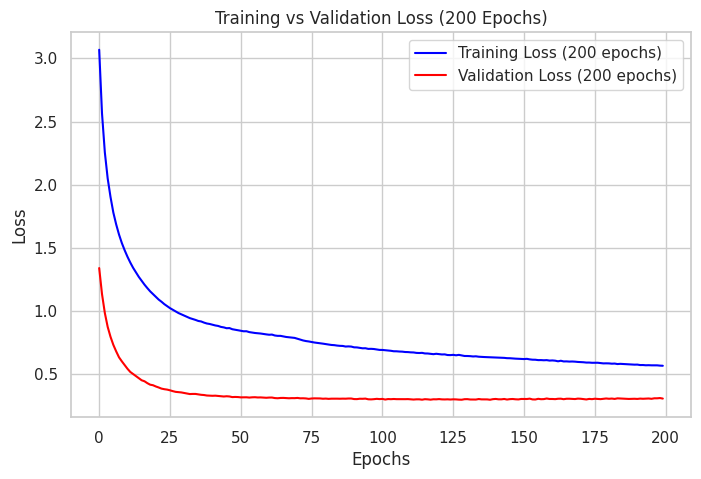


💡 Observation:
If validation loss starts increasing while training loss keeps decreasing,
it suggests **overfitting** — the model is learning noise rather than general patterns.



In [18]:
# ==============================================
# 🧪 Part Four: Further Investigation
# ==============================================

# 1️⃣ Experiment 1: Increase the number of epochs to 200
print("\n--- Training Model with 200 Epochs ---")

model_long = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(14,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_long.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_long = model_long.fit(
    X_train, np.asarray(y_train),
    batch_size=32,
    epochs=200,
    verbose=2,
    class_weight=class_weights,
    validation_split=0.2
)

# Plot training and validation loss across 200 epochs
loss_long = history_long.history['loss']
val_loss_long = history_long.history['val_loss']

plt.plot(loss_long, label='Training Loss (200 epochs)', color='blue')
plt.plot(val_loss_long, label='Validation Loss (200 epochs)', color='red')
plt.title("Training vs Validation Loss (200 Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("""
💡 Observation:
If validation loss starts increasing while training loss keeps decreasing,
it suggests **overfitting** — the model is learning noise rather than general patterns.
""")

Learning Rate: 0.001, Final Validation Accuracy = 0.8735
Learning Rate: 0.01, Final Validation Accuracy = 0.9029
Learning Rate: 0.05, Final Validation Accuracy = 0.8912


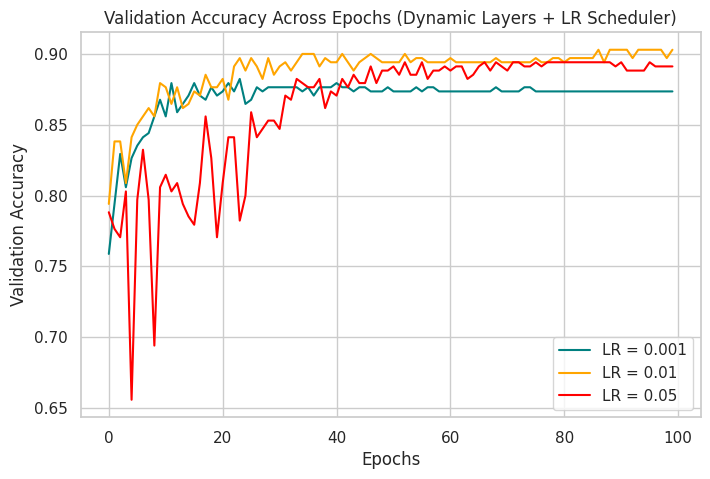

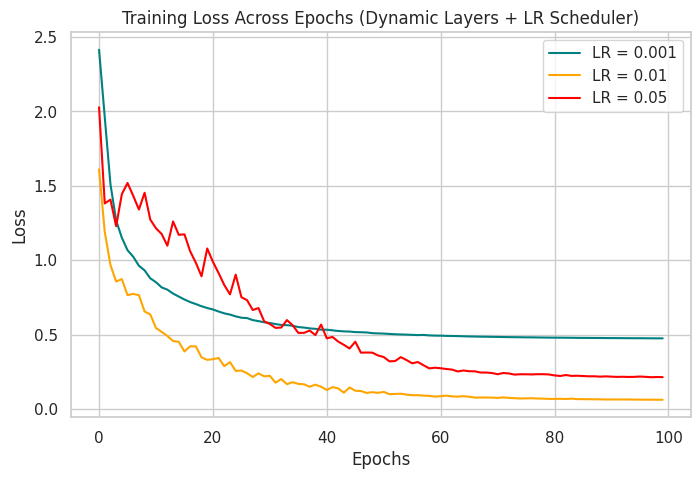

Final Validation Accuracy with LR=0.001: 0.8735
Final Validation Accuracy with LR=0.01: 0.9029
Final Validation Accuracy with LR=0.05: 0.8912

💡 Observations:
- Dynamic architecture allows flexible experimentation (e.g., num_layers=2–6).
- Learning rate scheduling gradually reduces LR each epoch (default decay 0.95).
- LR = 0.001 → slow but stable learning.
- LR = 0.01 → fast and balanced training (often best).
- LR = 0.05 → may overshoot or oscillate.
- Deeper networks may benefit more from LR scheduling to prevent divergence.



In [20]:
# ==============================================================
# 🧪 Experiment: Dynamic Deep Network + Learning Rate Scheduler
# ==============================================================

from tensorflow.keras.callbacks import LearningRateScheduler

def build_and_train_dynamic_model(num_layers=3,
                                   base_neurons=32,
                                   lr=0.01,
                                   epochs=80,
                                   use_scheduler=True):
    """
    Builds and trains a flexible deep neural network with variable depth and learning rate scheduling.

    Parameters:
      num_layers (int): number of hidden layers
      base_neurons (int): number of neurons in the first layer (each next layer halves this number)
      lr (float): initial learning rate
      epochs (int): number of training epochs
      use_scheduler (bool): apply learning rate decay if True

    Returns:
      final validation accuracy, training history, and model
    """

    # Define input
    inputs = tf.keras.Input(shape=(14,))
    x = inputs

    # Dynamically build hidden layers
    neurons = base_neurons
    for i in range(num_layers):
        x = tf.keras.layers.Dense(neurons, activation='relu')(x)
        neurons = max(4, neurons // 2)  # reduce neurons gradually, min 4

    # Output layer
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

    # Build model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Optimizer with chosen LR
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define LR scheduler
    def lr_scheduler(epoch, lr_current):
        decay_rate = 0.95
        return lr_current * decay_rate if use_scheduler else lr_current

    callbacks = [LearningRateScheduler(lr_scheduler)] if use_scheduler else []

    # Train model
    history = model.fit(
        X_train, np.asarray(y_train),
        batch_size=32,
        epochs=epochs,
        verbose=0,
        class_weight=class_weights,
        validation_split=0.2,
        callbacks=callbacks
    )

    final_val_acc = history.history['val_accuracy'][-1]
    return final_val_acc, history, model


# ==============================================================
# 🧩 Compare different learning rates for a 4-layer model
# ==============================================================

learning_rates = [0.001, 0.01, 0.05]
results_lr = {}
histories_lr = {}

for lr in learning_rates:
    acc, hist, _ = build_and_train_dynamic_model(num_layers=4, base_neurons=64, lr=lr, epochs=100)
    results_lr[lr] = acc
    histories_lr[lr] = hist
    print(f"Learning Rate: {lr}, Final Validation Accuracy = {acc:.4f}")

# ==============================================================
# 📊 Plot: Validation Accuracy vs Epochs
# ==============================================================

plt.figure(figsize=(8,5))
colors = ['teal', 'orange', 'red']
for (lr, hist), color in zip(histories_lr.items(), colors):
    plt.plot(hist.history['val_accuracy'], label=f"LR = {lr}", color=color)
plt.title("Validation Accuracy Across Epochs (Dynamic Layers + LR Scheduler)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# ==============================================================
# 📉 Plot: Training Loss vs Epochs
# ==============================================================

plt.figure(figsize=(8,5))
for (lr, hist), color in zip(histories_lr.items(), colors):
    plt.plot(hist.history['loss'], label=f"LR = {lr}", color=color)
plt.title("Training Loss Across Epochs (Dynamic Layers + LR Scheduler)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ==============================================================
# 📈 Print Summary Results
# ==============================================================

for lr, acc in results_lr.items():
    print(f"Final Validation Accuracy with LR={lr}: {acc:.4f}")

print("""
💡 Observations:
- Dynamic architecture allows flexible experimentation (e.g., num_layers=2–6).
- Learning rate scheduling gradually reduces LR each epoch (default decay 0.95).
- LR = 0.001 → slow but stable learning.
- LR = 0.01 → fast and balanced training (often best).
- LR = 0.05 → may overshoot or oscillate.
- Deeper networks may benefit more from LR scheduling to prevent divergence.
""")


In [16]:
# 3️⃣ Ethical Considerations
# --------------------------------------------------------------
from IPython.display import Markdown as md

md("""
### ⚖️ Ethical Considerations

When applying a neural network in a **medical setting** (like fetal health diagnosis), consider:

1. **False Negatives:** Missing a pathologic case could endanger a patient’s health.
2. **Bias & Fairness:** Ensure training data represents all demographics to avoid biased predictions.
3. **Transparency:** Clinicians need explainable models to trust predictions.
4. **Privacy:** Patient data must be securely stored and anonymized.
5. **Regulation:** AI-assisted diagnosis must comply with medical device regulations.

💬 As a Data Scientist, always balance **model performance** with **ethical responsibility**.
""")


### ⚖️ Ethical Considerations

When applying a neural network in a **medical setting** (like fetal health diagnosis), consider:

1. **False Negatives:** Missing a pathologic case could endanger a patient’s health.
2. **Bias & Fairness:** Ensure training data represents all demographics to avoid biased predictions.
3. **Transparency:** Clinicians need explainable models to trust predictions.
4. **Privacy:** Patient data must be securely stored and anonymized.
5. **Regulation:** AI-assisted diagnosis must comply with medical device regulations.

💬 As a Data Scientist, always balance **model performance** with **ethical responsibility**.
